# Part 1: Gather all necessary information 

In [47]:
import pandas as pd

### Data from ArcGIS 
* Sentera Data
* Field Metadata/ Master ID
* Image Name of Furrow Vision

In [48]:
#Data Generated from ArcGIS Pro Scrip
sentera_furrow = pd.read_excel("516x_Project/Data/Sentera_Furrow_Field_Data.xlsx")

In [49]:
print("Size of Data", sentera_furrow.shape)
print("Content:", sentera_furrow.columns)

Size of Data (13338, 79)
Content: Index(['Unnamed: 0', 'OBJECTID', 'Join_Count', 'TARGET_FID', 'Join_Count_1',
       'TARGET_FID_1', 'Shape_Leng', 'Master_ID', 'Plot_Numbe', 'Row_Number',
       'Zone_Numbe', 'Plant_Numb', 'Descriptio', 'Shape_Le_1', 'Duplicate',
       'FID_1', 'Row', 'Rep_Num', 'Notable', 'First_Dist', 'Last_Dist',
       'Prev_Dist', 'Next_Dist', 'SNext_Dist', 'SNext_ID', 'SPrev_Dist',
       'SPrev_ID', 'DNext_Dist', 'DNext_ID', 'DPrev_Dist', 'DPrev_ID',
       'Day1Detct', 'Day1Area', 'Emerge', 'Day1Angle', 'Day1Diam', 'Day1Leaf',
       'Day2Detct', 'Day2Area', 'Day2Angle', 'Day2Diam', 'Day2Leaf',
       'Day3Detct', 'Day3Area', 'Day3Angle', 'Day3Diam', 'Day3Leaf',
       'Day4Detct', 'Day4Area', 'Day4Angle', 'Day4Diam', 'Day4Leaf',
       'Day5Detct', 'Day5Area', 'Day5Angle', 'Day5Diam', 'Day5Leaf',
       'Day6Detct', 'Day6Area', 'Day6Angle', 'Day6Diam', 'Day6Leaf',
       'Day9Detct', 'Day9Area', 'Day9Angle', 'Day9Diam', 'Day9Leaf',
       'Day13Detct', 'Day1

In [50]:
yield_data = pd.read_excel("516x_Project/Data/Yield_Updated.xlsx")

### Yield Data (Needs Upate)

In [51]:
print("Size of Data", yield_data.shape)
print("Content:", yield_data.columns)

Size of Data (5337, 5)
Content: Index(['Master_ID', 'On_Field', 'Tag_On_Desk', 'Outside_State_Notes', 'WetWt'], dtype='object')


### Furrow Vision Image Attributes

In [52]:
furrow_data = pd.read_excel("516x_Project/Data/LabelData.xlsx")

In [53]:
print("Size of Data", furrow_data.shape)
print("Content:", furrow_data.columns)

Size of Data (12314, 27)
Content: Index(['Unnamed: 0', 'user', 'id', 'name', 'path name', 'width', 'height',
       'shapes', 'Seed_points', 'Trainable', 'Residue occlusion',
       'Seed tip (Pitch)', 'Seed germ (Roll)', 'Seed tip', 'Seed Type',
       'seed count', 'Seed_points_2', 'Trench_points', 'Shallow seeding depth',
       'Residue in trench', 'Is trench collapsed', 'Image not usable',
       'Residue', 'Seed_points_3', 'Seed_points_4',
       'TrenchDepthReference_points', 'Trench_points_0'],
      dtype='object')


### Dictionary to ralate row to planter treatment

In [54]:
treatments = {1:"Depth Shallow",
             2: "Depth Shallow",
             3: "Control",
             4: "Control",
             5: "Seed Quality Low",
             6: "Seed Quality Low",
             7: "Seed Quality High",
             8: "Seed Quality High",
             9: "Poor Closing",
             10: "Poor Closing",
             11: "High Trench Quality",
             12: "High Trench Quality",
             13: "Low Trench Quality",
             14: "Low Trench Quality",
             15: "Low Trench Quality",
             16: "Low Trench Quality",
             17: "Control",
             18: "Control",
             19: "Depth Deep",
             20: "Depth Deep",
             21: "Residue Low",
             22: "Residue Low",
             23: "Residue High",
             24: "Residue High" }

### ID for Rows

In [55]:
plot_numbers = list(sentera_furrow["Plot_Numbe"])
row_numbers = list(sentera_furrow["Row_Number"])

field_ID = []
for i in range(len(plot_numbers)):
    field_ID.append("P"+str(plot_numbers[i])+"R" + str(row_numbers[i]))

# Part 2: Join Data

### Add to Senetere-Furrow treatment information and Row ID

In [56]:
sentera_furrow["field_ID"] = field_ID

In [57]:
sentera_furrow.tail(3)

,Unnamed: 0,OBJECTID,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,Shape_Leng,Master_ID,Plot_Numbe,Row_Number,...,Day18Area,Note,Longitude,Latitude,Log_Name,Image_Name,Camera_Number,Number_Of_Seeds,SHAPE,field_ID
13335,13335,13336,1,13335,1,13336,0.436825,728887,9,3,...,0.010646,,-93.705440,42.042646,AmesISU_EastKelley_Corn_DigitalAcre_c4-00-ad-5...,image_sensorid_3_frame_206821_ts_1620152423.61...,3.0,2.0,"{'hasZ': True, 'hasM': True, 'rings': [[[44161...",P9R3
13336,13336,13337,1,13336,1,13337,0.436825,729746,9,16,...,0.010466,,-93.705320,42.042567,AmesISU_EastKelley_Corn_DigitalAcre_c4-00-ad-5...,image_sensorid_4_frame_247657_ts_1620155146.63...,4.0,1.0,"{'hasZ': True, 'hasM': True, 'rings': [[[44162...",P9R16
13337,13337,13338,1,13337,1,13338,0.436825,730216,9,24,...,0.005031,,-93.705247,42.042604,AmesISU_EastKelley_Corn_DigitalAcre_c4-00-ad-5...,image_sensorid_4_frame_284919_ts_1620157630.83...,4.0,0.0,"{'hasZ': True, 'hasM': True, 'rings': [[[44163...",P9R24


In [58]:
row = sentera_furrow["Row_Number"]
treat_list = []
for i in range(sentera_furrow.shape[0]):
    treat = treatments[row[i]]
    treat_list.append(treat)

sentera_furrow["Treatment"] = treat_list

In [59]:
sentera_furrow.head(3)

,Unnamed: 0,OBJECTID,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,Shape_Leng,Master_ID,Plot_Numbe,Row_Number,...,Note,Longitude,Latitude,Log_Name,Image_Name,Camera_Number,Number_Of_Seeds,SHAPE,field_ID,Treatment
0,0,1,1,0,0,1,0.485013,716904,1,1,...,missed detection,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasZ': True, 'hasM': True, 'rings': [[[44161...",P1R1,Depth Shallow
1,1,2,1,1,0,2,0.485013,716905,1,1,...,,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasZ': True, 'hasM': True, 'rings': [[[44161...",P1R1,Depth Shallow
2,2,3,0,2,0,3,0.485013,716906,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasZ': True, 'hasM': True, 'rings': [[[44161...",P1R1,Depth Shallow


### Attribute Join of Yield and Image Attribute 

In [60]:
join_1 =  pd.merge(sentera_furrow, furrow_data, how ="left", left_on = "Image_Name", right_on =  "name")

In [61]:
join_2 = pd.merge(join_1, yield_data, how ="left", on = "Master_ID")

In [62]:
complete_data = join_2

# Part 4: Eliminate Row with Null Yield

In [63]:
complete_data.dropna(subset = ["WetWt"], inplace = True)
complete_data.shape

(5337, 112)

# Part 5: Create dictionaries with means (plot and row)

In [64]:
#Calculate mean of each column when group by row 
row_means = complete_data.groupby(by="field_ID").mean()
row_means  = row_means.reset_index()
#Calculate mean of each column when group by plot 
plot_means = complete_data.groupby(by="Plot_Numbe").mean()
plot_means = plot_means.reset_index()


#Create dictionaries of means  
row_yield = dict(zip(row_means.field_ID, row_means.WetWt))
row_area13 = dict(zip(row_means.field_ID, row_means.Day13Area))

plot_yield = dict(zip(plot_means.Plot_Numbe, plot_means.WetWt))
plot_area13 = dict(zip(plot_means.Plot_Numbe, plot_means.Day13Area))


# Part 6: Normalize Data

### Normalization Function

In [65]:
def normalization(values, mean_dict, categories):
    norm_list = []
    for i in range(len(values)):
        norm_value = mean_dict[categories[i]]
        norm_list.append(values[i]/norm_value)
    return norm_list

### Creating and adding normalized values to df

In [66]:
plot_number_list  = list(complete_data["Plot_Numbe"])
field_ID_list = list(complete_data["field_ID"])
WetWt_list = list(complete_data["WetWt"])
area13_list = list(complete_data["Day13Area"])


yield_norm_plot = normalization (WetWt_list,plot_yield,plot_number_list)
complete_data["yield_norm_plot"] = yield_norm_plot

yield_norm_row = normalization (WetWt_list,row_yield,field_ID_list)
complete_data["yield_norm_row"] = yield_norm_row

area13_norm_plot = normalization (area13_list, plot_area13,plot_number_list)
complete_data["area13_norm_plot"] = area13_norm_plot

area13_norm_row = normalization (area13_list, row_area13,field_ID_list)
complete_data["area13_norm_row"] = area13_norm_row

In [46]:
complete_data.to_excel("516x_Project/Data/Complete_Data.xlsx")

# Part 6: Visualization

In [69]:
import matplotlib.pyplot as plt

(120.0, 210.0)

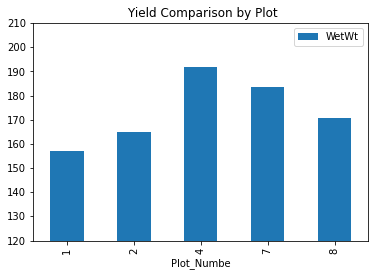

In [77]:
plot_means.plot.bar(x = "Plot_Numbe", y = "WetWt")
plt.title(" Yield Comparison by Plot")
plt.ylim(120, 210)

(0.003, 0.0045)

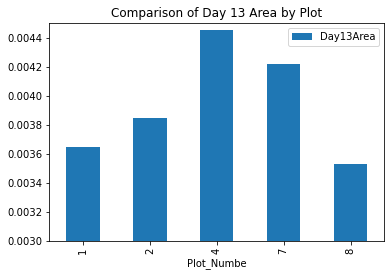

In [87]:
plot_means.plot.bar(x = "Plot_Numbe", y = "Day13Area")
plt.title("Comparison of Day 13 Area by Plot")
plt.ylim(0.003, 0.0045)

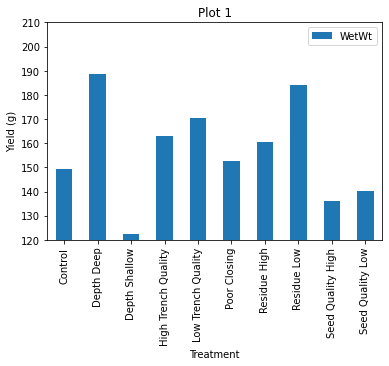

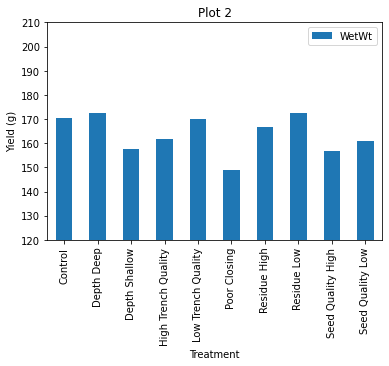

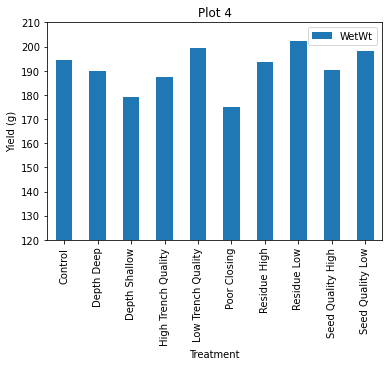

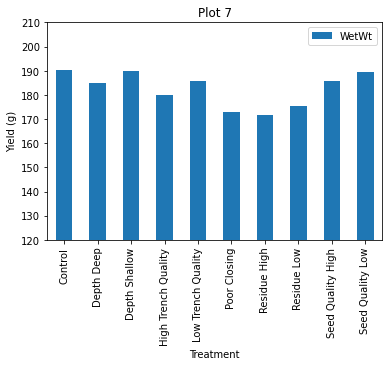

In [88]:
for i in [1,2,4,7]:
    plot_name = "Plot " + str(i) 
    plot = complete_data[complete_data["Plot_Numbe"] == i]
    plot.groupby('Treatment').mean().plot(kind = 'bar', y = 'WetWt')
    plt.title(plot_name)
    plt.ylim(120, 210)
    plt.ylabel('Yield (g)')

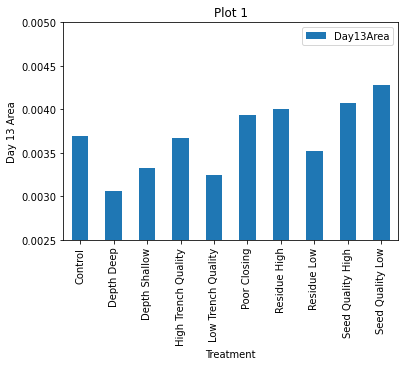

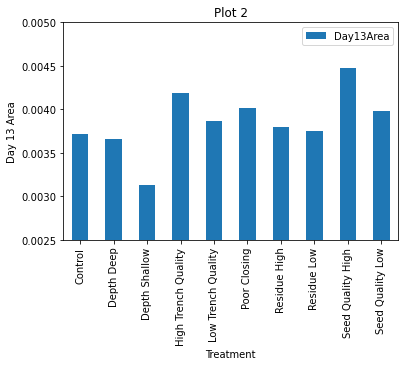

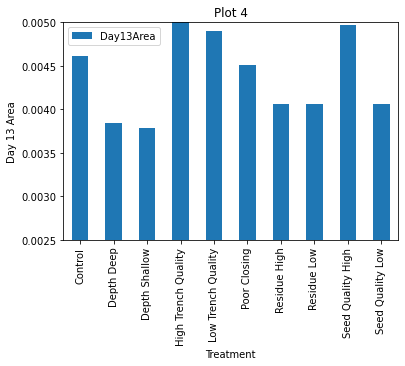

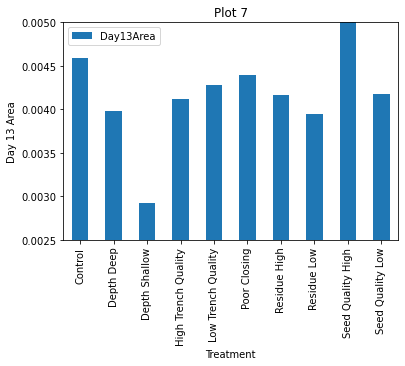

In [94]:
for i in [1,2,4,7]:
    plot_name = "Plot " + str(i) 
    plot = complete_data[complete_data["Plot_Numbe"] == i]
    plot.groupby('Treatment').mean().plot(kind = 'bar', y = 'Day13Area')
    plt.title(plot_name)
    plt.ylim((0.0025, 0.0050))
    plt.ylabel('Day 13 Area')